<a href="https://colab.research.google.com/github/kazimovmirkazim/Machine-Learning/blob/main/Iris_Petal_Length_Width_Binary_Classification_Dataset_Ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn  import datasets

In [2]:
iris=datasets.load_iris(as_frame=True)
X=iris.data[["petal length (cm)", "petal width (cm)"]].values
y= iris.target

In [3]:
setosa_or_versicolor = (y == 0) | (y == 1)
X= X [setosa_or_versicolor ]
y= y [setosa_or_versicolor ]

In [4]:
# SVM CLASSIFER MODEL
svm_clf = SVC(kernel='linear',C=1e100)
svm_clf.fit(X,y)

SVC(C=1e+100, kernel='linear')

In [5]:
svm_clf.score(X,y)

1.0

In [6]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
    zorder=-1)

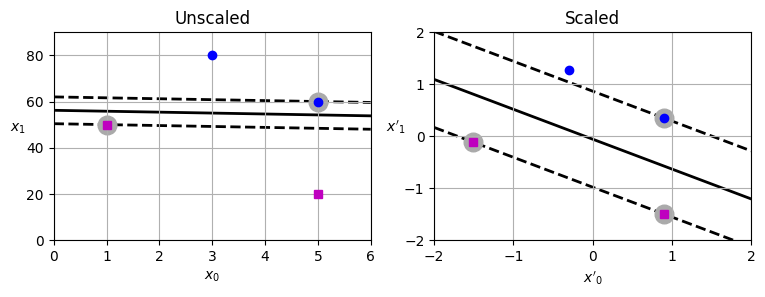

In [7]:
from sklearn.preprocessing import StandardScaler
Xs = np.array([[1,50], [5,20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel='linear', C=100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel='linear', C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0] [ys==1], Xs[:, 1][ys==1], 'bo')
plt.plot(Xs[:, 0] [ys==0], Xs[:, 1][ys==0], 'ms')
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$  ', rotation=0)
plt.title('Unscaled')
plt.axis([0, 6, 0, 90])
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:,0][ys==1], X_scaled[:,1][ys==1], 'bo')
plt.plot(X_scaled[:,0][ys==0], X_scaled[:,1][ys==0], 'ms')
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation = 0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2])
plt.grid()

plt.show()

Linear SVC


In [8]:
from pickle import load
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris (as_frame=True)
X= iris.data[["petal length (cm)","petal width (cm)"]].values
y= (iris.target == 2)                  # iris virginica
svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1,random_state=42))
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [9]:
svm_clf.score(X,y)

0.96

In [10]:
X_new = [[5.5,1.7],[5.,1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [11]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

The lower we  set 'C',the wider the street,so we reduce overfitting

Nonlinean SVM CLASSIVICATION


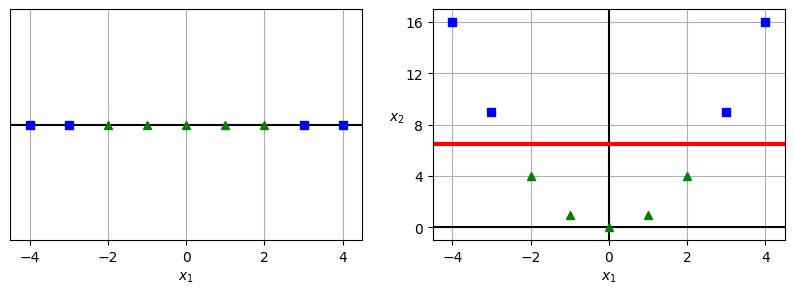

In [12]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]          # --> c_ concatanate demekdi-BIRLESDIRMEK
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.plot(X1D[:,0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:,0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')                          # koordinat oxu xettlerini chekir
plt.axvline(x=0, color='k')                          # koordinat oxu xettlerini chekir
plt.plot(X2D[:,0][y==0], X2D[:,1][y==0],'bs')
plt.plot(X2D[:,0][y==1], X2D[:,1][y==1],'g^')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$  ", rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12 ,16])
plt.plot([-4.5, 4.5], [6.5, 6.5], 'r-', linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.show()

In [13]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples=100,noise=0.15,random_state=42)

polynomial_svm_clf = make_pipeline (
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10,max_iter=10_000,random_state=42)
)
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [14]:
polynomial_svm_clf.score(X,y)

0.99

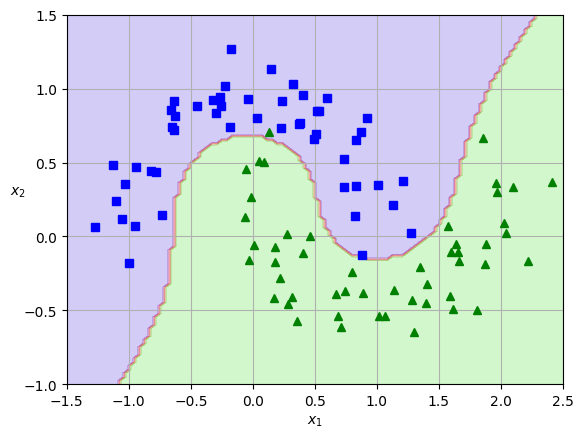

In [15]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)
def plot_predictions(clf, axes):
        x0s = np.linspace(axes[0], axes[1], 100)
        x1s = np.linspace(axes[2], axes[3], 100)
        x0, x1 = np.meshgrid(x0s, x1s)
        X = np.c_[x0.ravel(), x1.ravel()]
        y_pred = clf.predict(X).reshape(x0.shape)
        plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()